# INFO 2950 Phase 2: Data Exploration

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = "../data"

## Instagram Statistics

First, we load the dataframes from `.csv` files. The data is cleaned in our [data cleaning notebook](phase2-data.ipynb).

In [3]:
instagram_dir = os.path.join(data_dir, "instagram") # instagram dataset
instagram_files = os.listdir(instagram_dir)

instagram_files[:10]

['amherstcollege.csv',
 'arizonastateuniversity.csv',
 'bostoncollege.csv',
 'bostonu.csv',
 'bowdoincollege.csv',
 'brownu.csv',
 'caltechedu.csv',
 'carletoncollege.csv',
 'carnegiemellon.csv',
 'claremontmckennacollege.csv']

In [4]:
instagram_df = {}
for file in instagram_files:
    df = pd.read_csv(os.path.join(instagram_dir, file))
    df.date = pd.to_datetime(df.date)
    instagram_df[file.split(".")[0]] = df

instagram_df["cornelluniversity"].dtypes

date         datetime64[ns]
followers             int64
following             int64
posts                 int64
dtype: object

Here, we are visualizing the change in follower counts for the different colleges/universities. We've separated the data by their means so it's easier to compare institutions with similar follower counts.

In [5]:
college_names = []
follower_means = []

for (name, df) in instagram_df.items():
    followers = df.followers
    
    follower_mean = followers.mean()
    
    college_names.append(name)
    follower_means.append(follower_mean)

follower_means_df = pd.DataFrame(data={"name": college_names, "follower_means": follower_means})
follower_means_df = follower_means_df.sort_values(by=["follower_means"]).reset_index(drop=True)
follower_means_df.head()

,name,follower_means
0,csupueblo,2368.051546
1,harvey_mudd,2626.950382
2,pitzercollege,4091.458182
3,claremontmckennacollege,5093.824047
4,grinnellcollege,5918.211144


In [6]:
def follower_counts(n, offset):
    return follower_means_df.loc[offset:offset+n-1]

follower_counts(5,0)

,name,follower_means
0,csupueblo,2368.051546
1,harvey_mudd,2626.950382
2,pitzercollege,4091.458182
3,claremontmckennacollege,5093.824047
4,grinnellcollege,5918.211144


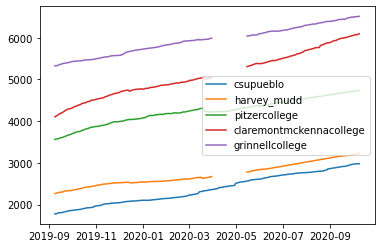

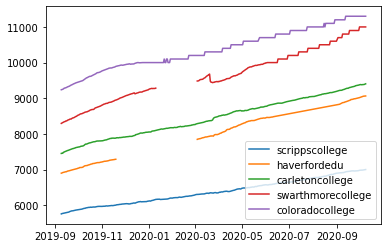

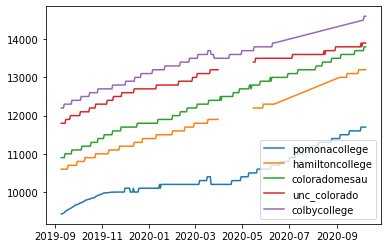

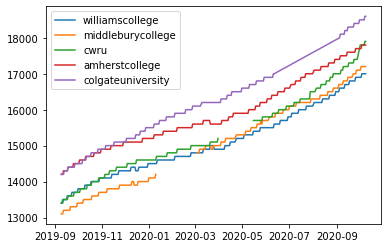

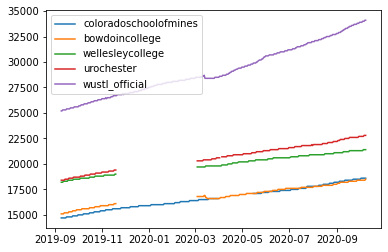

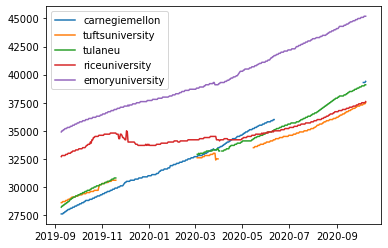

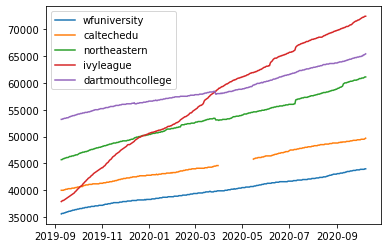

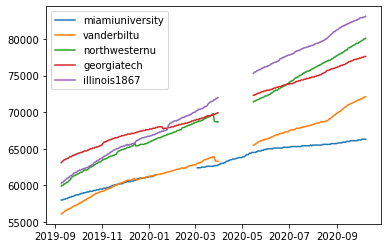

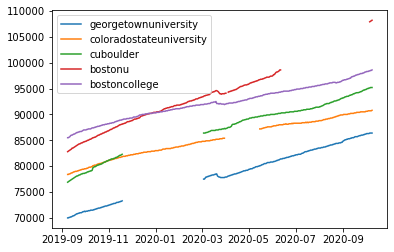

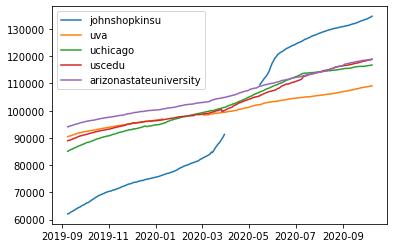

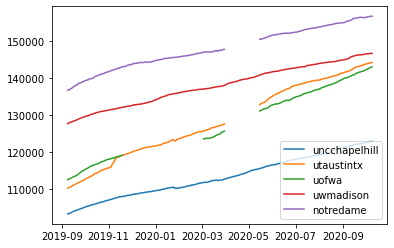

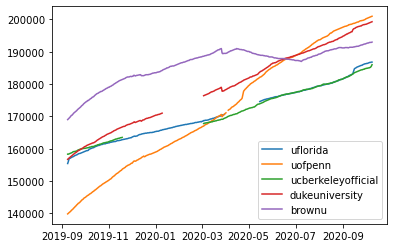

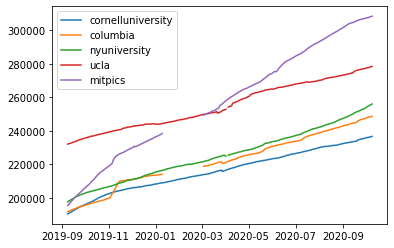

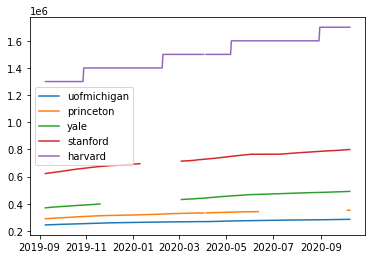

In [7]:
n = 5
offset = 0
while not follower_counts(n,offset).empty:
    names = follower_counts(n,offset).name
    
    for name in names:
        df = instagram_df[name]
        date = df.date
        followers = df.followers
        plt.plot(date, followers, label=name)
    plt.legend()
    plt.show()
    
    offset += n

In [8]:
follower_means_df[follower_means_df.name == "mitpics"]

,name,follower_means
64,mitpics,258698.231672


Here, we examine the percentage increases of each college/university's follower counts. Johns Hopkins University sticks out as the biggest outlier.

,name,percent_increase
0,johnshopkinsu,116.908213
1,ivyleague,91.029024
2,csupueblo,67.772778
3,mitpics,57.698210
4,claremontmckennacollege,48.369036


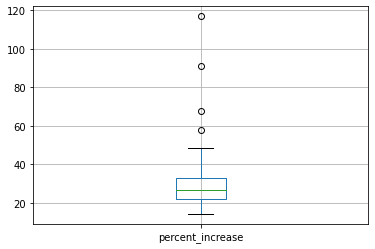

In [9]:
college_names = []
follower_percent_increases = []

for (name, df) in instagram_df.items():
    followers = df.followers
    
    follower_percent_increase = (followers.max() - followers.min()) / followers.min() * 100
    
    college_names.append(name)
    follower_percent_increases.append(follower_percent_increase)

follower_increase = pd.DataFrame(data={"name": college_names, "percent_increase": follower_percent_increases})
follower_increase = follower_increase.sort_values(by=["percent_increase"], ascending=False).reset_index(drop=True)
follower_increase.boxplot()
follower_increase.head()

In [10]:
instagram_df["johnshopkinsu"]

,date,followers,following,posts
0,2019-09-08 15:42:40.984521,62100.0,435.0,603
1,2019-09-09 12:00:19.072506,62200.0,435.0,603
2,2019-09-10 12:00:11.641788,62300.0,436.0,604
3,2019-09-11 12:00:11.432705,62500.0,436.0,604
4,2019-09-12 12:00:12.890873,62700.0,436.0,605
...,...,...,...,...
387,2020-10-04 12:00:21.459382,134100.0,473.0,789
388,2020-10-05 12:00:19.574908,134200.0,474.0,789
389,2020-10-06 12:00:21.095279,134400.0,474.0,790
390,2020-10-07 12:00:21.776247,134500.0,474.0,790


## College/University Information

First, we load the dataframe from the cleaned `.csv` file.

In [11]:
scorecard = pd.read_csv(os.path.join(data_dir, "scorecard.csv"))
scorecard.head()

,admission_rate,sat_score,cost_attendance,income_avg,income_med,size,lat,lon,city,name,ownership,region,state,locale_type,locale_size
0,0.6126,1125.0,46026.0,66334.0,49741.0,1918.0,39.842612,-88.976298,Decatur,Millikin University,private non-profit,great lakes,IL,city,small
1,0.6937,1114.0,47726.0,70047.0,59988.0,901.0,40.914824,-90.637310,Monmouth,Monmouth College,private non-profit,great lakes,IL,town,medium
2,0.7593,NaN,42221.0,67598.0,59194.0,971.0,39.731300,-90.246171,Jacksonville,Illinois College,private non-profit,great lakes,IL,town,medium
3,0.6815,1079.0,39884.0,64558.0,50859.0,916.0,39.938898,-91.385975,Quincy,Quincy University,private non-profit,great lakes,IL,town,small
4,0.6351,1113.0,25766.0,52255.0,46593.0,398.0,40.148924,-89.346721,Lincoln,Lincoln Christian University,private non-profit,great lakes,IL,town,medium


In [12]:
scorecard.describe()

,admission_rate,sat_score,cost_attendance,income_avg,income_med,size,lat,lon
count,1658.000000,1254.000000,1849.000000,1964.000000,1964.000000,2023.000000,2024.000000,2024.000000
mean,0.667750,1145.650718,35085.914548,60685.449084,46486.128819,4457.300049,37.994607,-88.185451
std,0.211910,124.133816,15897.558098,26295.028003,22941.685830,7627.156284,5.726886,17.173717
min,0.000000,785.000000,6646.000000,4896.000000,0.000000,0.000000,13.433047,-158.056403
25%,0.550325,1062.250000,21859.000000,42167.250000,29653.250000,649.000000,34.724231,-95.264171
50%,0.692200,1126.500000,31391.000000,58215.500000,42594.000000,1671.000000,39.645911,-84.507448
75%,0.827300,1204.000000,46150.000000,77216.000000,61233.750000,4571.500000,41.680523,-76.603140
max,1.000000,1566.000000,75735.000000,174263.000000,179864.000000,88921.000000,64.857560,144.835821


Although we are more interested in the Instagram data, we are curious about the relationships between some of the variables in this dataset. So, we explore that here.

In [13]:
def plotCorrelation(df, var1, var2):
    series1 = df[var1]
    series2 = df[var2]
    correlation = series1.corr(series2)
    print("Correlation between {} and {}: {:.2f}".format(var1, var2, correlation))
    plt.scatter(series1, series2, alpha=0.3)
    plt.show()

Correlation between lon and lat: -0.06


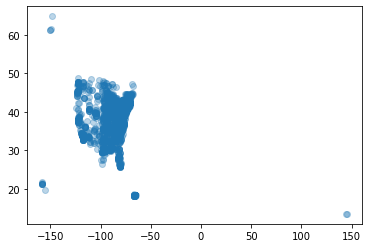

In [14]:
# hey, is that the United States?!
plotCorrelation(scorecard, "lon", "lat")

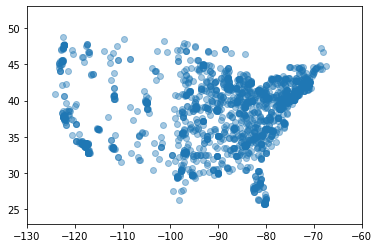

In [15]:
# yes it is!
plt.scatter(scorecard.lon, scorecard.lat, alpha=0.4)
plt.xlim(-130, -60)
plt.ylim(23, 53)
plt.show()

Correlation between sat_score and admission_rate: -0.45


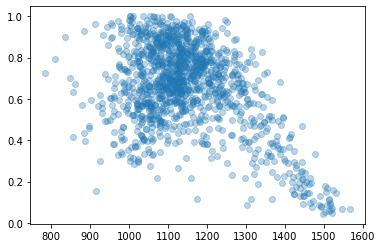

In [16]:
plotCorrelation(scorecard, "sat_score", "admission_rate")

Correlation between cost_attendance and income_med: 0.60


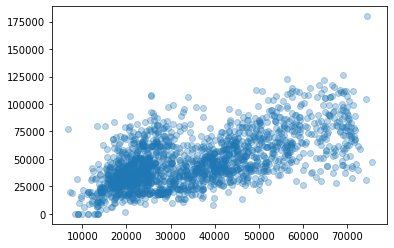

In [17]:
plotCorrelation(scorecard, "cost_attendance", "income_med")

Correlation between cost_attendance and size: -0.18


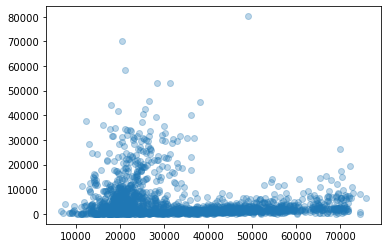

In [18]:
plotCorrelation(scorecard, "cost_attendance", "size")

Correlation between income_med and sat_score: 0.56


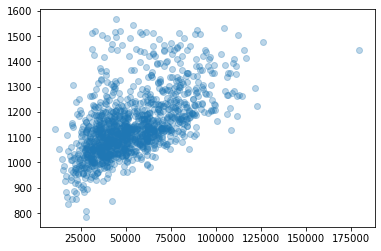

In [19]:
plotCorrelation(scorecard, "income_med", "sat_score")

## Merged Dataset

First, we load the dataframe from the merged dataset `.csv` file.

In [20]:
instagram_details = pd.read_csv(os.path.join(data_dir, "instagram_details.csv"))
instagram_details.head()

,name,instagram,follower_curr,follower_mean,follower_med,follower_std,follower_min,follower_max,following_curr,following_mean,...,income_med,size,lat,lon,city,ownership,region,state,locale_type,locale_size
0,Amherst College,amherstcollege,17800.0,15857.662338,15600.0,959.139013,14200.0,17800.0,650.0,636.251948,...,42053.0,1855.0,42.372459,-72.518493,Amherst,private non-profit,new england,MA,suburb,large
1,Arizona State University-Tempe,arizonastateuniversity,118900.0,105752.835052,104450.0,7242.379383,94100.0,118900.0,1523.0,1545.634021,...,35851.0,42529.0,33.417721,-111.934383,Tempe,public,southwest,AZ,city,medium
2,Boston College,bostoncollege,98600.0,92220.822622,92100.0,3247.227738,85500.0,98600.0,301.0,267.388175,...,103007.0,9639.0,42.336213,-71.169242,Chestnut Hill,private non-profit,new england,MA,city,small
3,Boston University,bostonu,108200.0,91363.868613,91500.0,4608.620804,82800.0,108200.0,2775.0,2568.832117,...,81244.0,17238.0,42.351118,-71.107942,Boston,private non-profit,new england,MA,city,large
4,Bowdoin College,bowdoincollege,18500.0,16983.629893,17100.0,939.613708,15100.0,18500.0,1542.0,1512.483986,...,61622.0,1825.0,43.907134,-69.963942,Brunswick,private non-profit,new england,ME,town,large


It might be insightful to see what kinds of institutions Changyuan was interested in, and thus what kind of institutions we are analyzing.

In [21]:
instagram_describe = instagram_details.describe()
instagram_describe[["follower_curr", "following_curr", "posts_curr", "admission_rate", "sat_score", "size"]]

,follower_curr,following_curr,posts_curr,admission_rate,sat_score,size
count,7.000000e+01,70.000000,70.000000,67.000000,63.000000,67.000000
mean,1.275118e+05,663.614286,1736.528571,0.254749,1425.666667,11121.179104
std,2.303420e+05,999.835947,851.887907,0.234740,109.487663,11036.835696
min,2.983000e+03,72.000000,388.000000,0.043600,1022.000000,886.000000
25%,1.782500e+04,188.500000,1146.750000,0.104350,1419.500000,2742.000000
50%,6.920000e+04,358.000000,1657.500000,0.173300,1448.000000,6840.000000
75%,1.438250e+05,599.250000,2209.500000,0.271600,1499.500000,15803.000000
max,1.700000e+06,6957.000000,5357.000000,0.952000,1566.000000,42529.000000


In [22]:
def printStat(statName, statSeries):
    follower_stat = statSeries.follower_curr
    following_stat = statSeries.following_curr
    posts_stat = statSeries.posts_curr

    print("{} of current follower counts: {:.0f}".format(statName, follower_stat))
    print("{} of current following counts: {:.0f}".format(statName, following_stat))
    print("{} of current post counts: {:.1f}".format(statName, posts_stat))
    print()

In [23]:
printStat("Mean", instagram_details.mean())
printStat("Median", instagram_details.median())
printStat("Min", instagram_details.min())
printStat("Max", instagram_details.max())

Mean of current follower counts: 127512
Mean of current following counts: 664
Mean of current post counts: 1736.5

Median of current follower counts: 69200
Median of current following counts: 358
Median of current post counts: 1657.5

Min of current follower counts: 2983
Min of current following counts: 72
Min of current post counts: 388.0

Max of current follower counts: 1700000
Max of current following counts: 6957
Max of current post counts: 5357.0



The following is a visualization of the subset (compared to the previous section) of institutions Changyuan scraped data for.

Correlation between lon and lat: 0.46


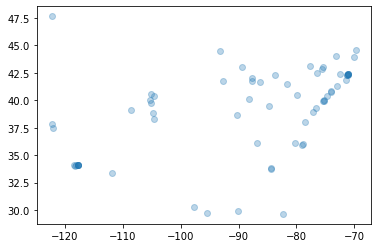

In [24]:
plotCorrelation(instagram_details, "lon", "lat")

Correlation between sat_score and admission_rate: -0.93


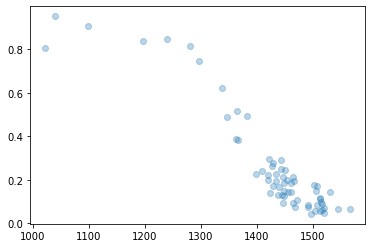

In [25]:
plotCorrelation(instagram_details, "sat_score", "admission_rate")

The main point of merging datasets was to see if there was any correlation between variables (summary statistics, as well as between datasets). So, we explore that here.

Correlation between follower_med and following_med: -0.11


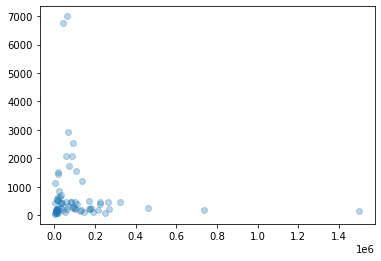

In [26]:
plotCorrelation(instagram_details, "follower_med", "following_med")

Correlation between follower_med and posts_med: 0.14


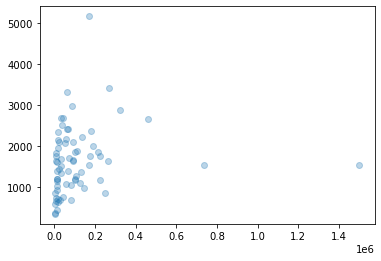

In [27]:
plotCorrelation(instagram_details, "follower_med", "posts_med")

Correlation between following_med and posts_med: 0.32


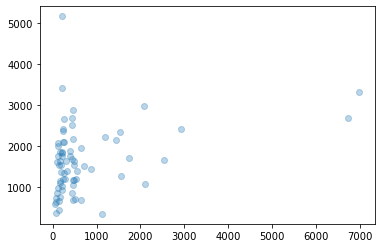

In [28]:
plotCorrelation(instagram_details, "following_med", "posts_med")

Correlation between follower_med and admission_rate: -0.21


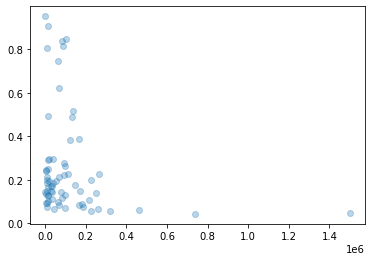

In [29]:
plotCorrelation(instagram_details, "follower_med", "admission_rate")

Correlation between follower_med and size: 0.13


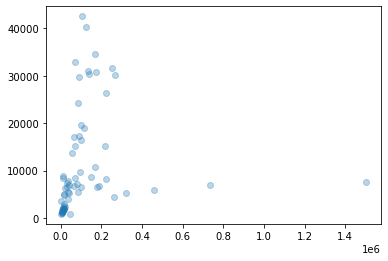

In [30]:
plotCorrelation(instagram_details, "follower_med", "size")

The plots are not that informative, because of three main outliers. We can visualize the graphs without Harvard, Stanford, and Yale.

In [31]:
outliers = {"Harvard University", "Stanford University", "Yale University"}
filtered_instagram_details = instagram_details[~instagram_details.name.isin(outliers)]

Correlation between follower_med and following_med: -0.08


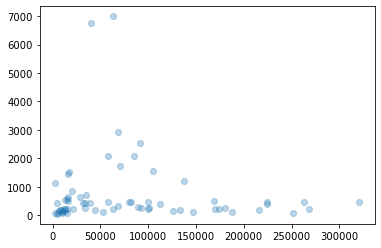

In [32]:
plotCorrelation(filtered_instagram_details, "follower_med", "following_med")

Correlation between follower_med and posts_med: 0.35


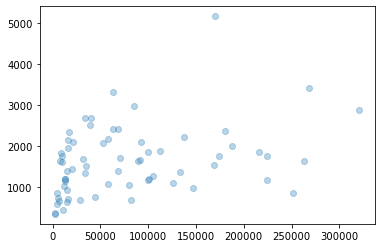

In [33]:
plotCorrelation(filtered_instagram_details, "follower_med", "posts_med")

Correlation between following_med and posts_med: 0.33


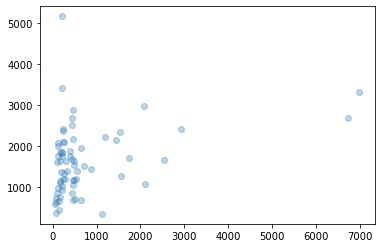

In [34]:
plotCorrelation(filtered_instagram_details, "following_med", "posts_med")

Correlation between follower_med and admission_rate: -0.16


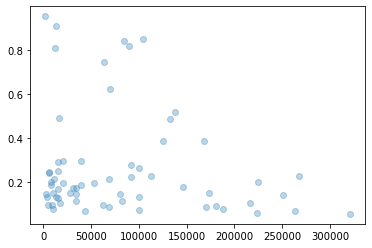

In [35]:
plotCorrelation(filtered_instagram_details, "follower_med", "admission_rate")

Correlation between follower_med and size: 0.51


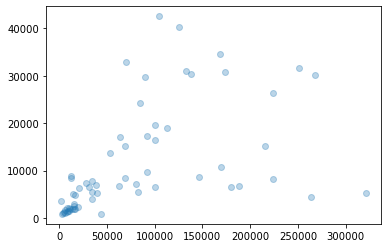

In [36]:
plotCorrelation(filtered_instagram_details, "follower_med", "size")

There seems to be a medium correlation between follower count and size.  
We expect there to be a correlation between follower count and popularity. Unfortunately, there is no explicit metric for popularity in the scorecard dataset.